In [ ]:
# Upload data Knight.pickle

In [1]:
#!pip install torch==2.0.1

In [2]:
#!pip install bertopic

In [1]:
#!pip install 'bertopic[flair, gensim, spacy, use]'

In [1]:
import numpy as np
import pandas as pd
import json
import os
import pickle

import warnings
warnings.filterwarnings('ignore')

from top2vec import Top2Vec

In [2]:
# !pip install top2vec
# !pip install top2vec[sentence_encoders]
# !pip install contextualized-topic-models
# !pip install nltk
# !pip install pyldavis
# !pip install numpy==1.23.5

# !pip install bertopic
# !pip install 'bertopic[flair, gensim, spacy, use]'

# Upload data Knight.pickle

In [3]:
from bertopic import BERTopic

with open('Knight.pickle', 'rb') as handle:
    docs_d = pickle.load(handle)
docs = list(docs_d.values())
df = pd.DataFrame(docs, columns=["text"])
docs_d={k:v+"." if v[-1]!="." else v for k,v in docs_d.items()}
docs=df.text.tolist()
print(len(docs))

271


In [4]:
# from sentence_transformers import SentenceTransformer

# topic_model = BERTopic()
# sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
model = BERTopic("distilbert-base-nli-mean-tokens", verbose=True)
topics, probabilities = model.fit_transform(docs)
# topic_model = BERTopic(embedding_model=sentence_model)
# embeddings = sentence_model.encode(docs, show_progress_bar=True)
# topic_model = BERTopic().fit(docs, embeddings)
# topics, probabilities = topic_model.fit_transform(docs)

2023-10-27 12:14:08,477 - BERTopic - Transformed documents to Embeddings
2023-10-27 12:14:16,082 - BERTopic - Reduced dimensionality
2023-10-27 12:14:16,089 - BERTopic - Clustered reduced embeddings


In [5]:
%load_ext rpy2.ipython

import pandas as pd
df = pd.DataFrame({
    'cups_of_coffee': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'productivity': [2, 5, 6, 8, 9, 8, 0, 1, 0, -1]
})

Need help getting started? Try the R Graphics Cookbook:
https://r-graphics.org
In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/local/lib/R/site-library’ contains no packages


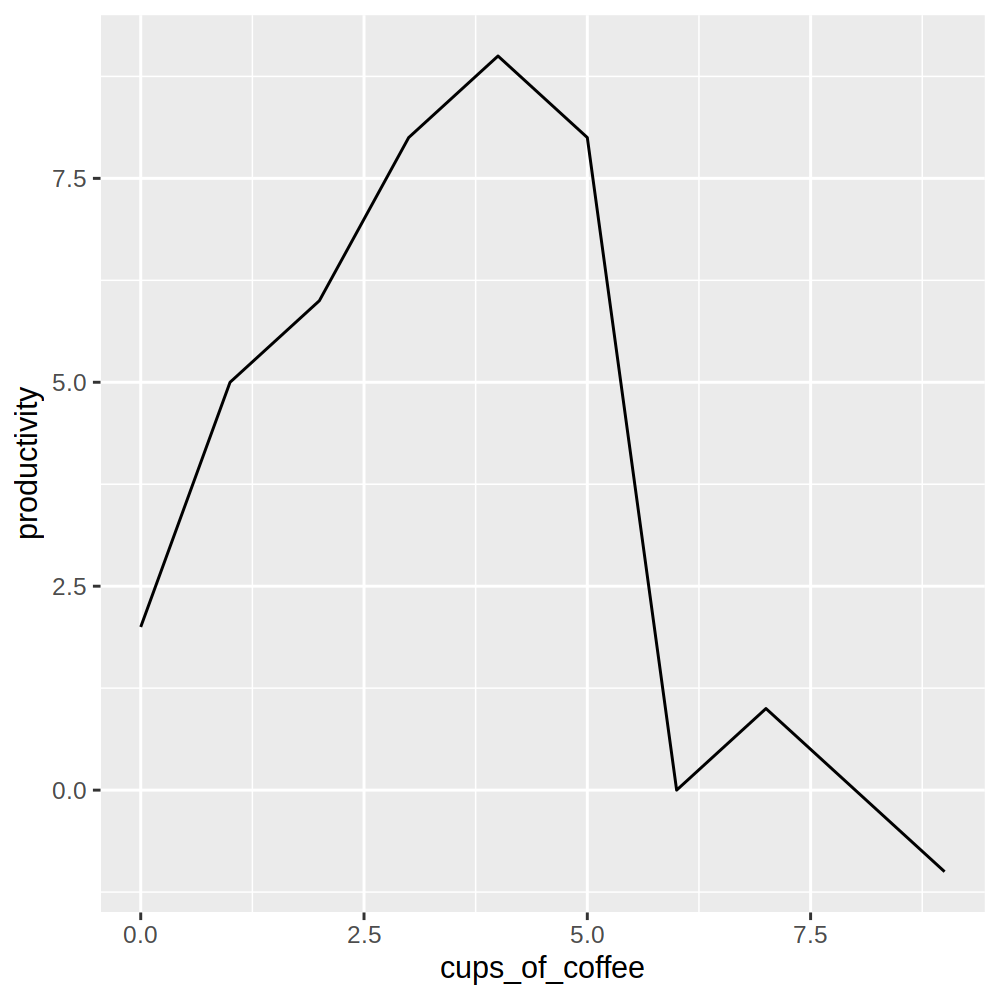

In [7]:
%%R -i df -w 5 -h 5 --units in -r 200
# import df from global environment
# make default figure size 5 by 5 inches with 200 dpi resolution

library(ggplot2)
ggplot(df, aes(x=cups_of_coffee, y=productivity)) + geom_line()

In [9]:
import rpy2.robjects as robjects
robjects.globalenv['aaaaa']

KeyError: "'aaaaa' not found"

In [ ]:
topic_model.get_topic_freq() #.head(11)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,Count
2,-1,109
0,0,38
3,1,35
1,2,27
6,3,21
7,4,20
4,5,11
5,6,10


In [ ]:
list(range(-1,len(topic_model.get_topic_freq())-1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[-1, 0, 1, 2, 3, 4, 5, 6]

In [ ]:
# import operator

for i in list(range(-1,len(topic_model.get_topic_freq())-1)):
  tp=topic_model.get_topic(i)
  # tp=tp.sort(key=operator.itemgetter(1))
  print(tp)

[('for', 0.0217226417703288), ('by', 0.022573470975472888), ('was', 0.025596924545167102), ('as', 0.0267678964263031), ('that', 0.03226440878271448), ('to', 0.04424503585367497), ('in', 0.04566618663105491), ('and', 0.050229205277575024), ('of', 0.05983929005551761), ('the', 0.07631635568590145)]
[('for', 0.02205084946064565), ('were', 0.02276793992036188), ('as', 0.02666497186053661), ('that', 0.02809022415010236), ('was', 0.02818767923543705), ('in', 0.04415848741377567), ('to', 0.04439083936139456), ('and', 0.05618428811817244), ('of', 0.061485799749093135), ('the', 0.07552197150642344)]
[('by', 0.021621325298156746), ('for', 0.02201109120833264), ('as', 0.02543798107414006), ('was', 0.026922187474144908), ('that', 0.0280338152484175), ('in', 0.0447985378771175), ('to', 0.05084827234726829), ('and', 0.05419175372591493), ('of', 0.06156567555665843), ('the', 0.075714771157727)]
[('on', 0.02464524669989715), ('he', 0.0247776391052627), ('his', 0.027075830788153673), ('was', 0.03432276

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_model.get_topic(-1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('for', 0.0217226417703288),
 ('by', 0.022573470975472888),
 ('was', 0.025596924545167102),
 ('as', 0.0267678964263031),
 ('that', 0.03226440878271448),
 ('to', 0.04424503585367497),
 ('in', 0.04566618663105491),
 ('and', 0.050229205277575024),
 ('of', 0.05983929005551761),
 ('the', 0.07631635568590145)]

In [ ]:
# Import Libraries
from contextualized_topic_models.models.ctm import CombinedTM
from contextualized_topic_models.utils.data_preparation import TopicModelDataPreparation
from contextualized_topic_models.utils.preprocessing import WhiteSpacePreprocessingStopwords
import nltk

In [ ]:
with open('Knight.pickle', 'rb') as handle:
    docs_d = pickle.load(handle)
docs = list(docs_d.values())
df = pd.DataFrame(docs, columns=["text"])
docs_d={k:v+"." if v[-1]!="." else v for k,v in docs_d.items()}
docs=df.text.tolist()
print(len(docs))

from nltk.corpus import stopwords as stop_words
nltk.download('stopwords')
documents = docs #[line.strip() for line in open(text_file, encoding="utf-8").readlines()[0:2000]]
stopwords = list(stop_words.words("english"))
sp = WhiteSpacePreprocessingStopwords(documents, stopwords_list=stopwords)
preprocessed_documents, unpreprocessed_corpus, vocab, retained_indices = sp.preprocess()

271


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tp = TopicModelDataPreparation("all-mpnet-base-v2")
training_dataset = tp.fit(text_for_contextual=unpreprocessed_corpus, text_for_bow=preprocessed_documents)

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
print(tp.vocab[:10])

['abduction' 'ability' 'able' 'abolitionist' 'abolitionists' 'abortion'
 'abraham' 'accepted' 'access' 'accident']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
n_components=8
ctm = CombinedTM(bow_size=len(tp.vocab), contextual_size=768, n_components=n_components, num_epochs=10)
ctm.fit(training_dataset) # run the model

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Epoch: [10/10]	 Seen Samples: [2560/2710]	Train Loss: 3991.7919921875	Time: 0:00:00.576672: : 10it [00:06,  1.50it/s]
100%|██████████| 5/5 [00:00<00:00, 12.17it/s]


In [ ]:
ctm.get_topic_lists(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['george',
  'ufo',
  'control',
  'alien',
  'law',
  'actively',
  'belief',
  'knowledge',
  'paranoia',
  'period'],
 ['conspiracy',
  'cia',
  'would',
  'agents',
  'government',
  'right',
  'well',
  'sedition',
  'oswald',
  'united'],
 ['health',
  'percent',
  'trilateral',
  'manner',
  'attempting',
  'alexander',
  'underground',
  'aids',
  'militant',
  'communist'],
 ['money',
  'cuban',
  'death',
  'actively',
  'friends',
  'clinton',
  'found',
  'controversy',
  'dr',
  'park'],
 ['views',
  'obvious',
  'orders',
  'elijah',
  'bring',
  'step',
  'lyndon',
  'expanded',
  'friends',
  'expressed'],
 ['internal',
  'meaning',
  'things',
  'stop',
  'paul',
  'ridge',
  'documents',
  'consider',
  'extremely',
  'broadcast'],
 ['states',
  'christian',
  'early',
  'fbi',
  'people',
  'church',
  'claimed',
  'seen',
  'order',
  'police'],
 ['slaves',
  'newly',
  'governor',
  'manner',
  'british',
  'method',
  'massacre',
  'area',
  'joined',
  'carolina

In [ ]:
ctm.get_topic_lists(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['george', 'ufo', 'control', 'alien', 'law'],
 ['conspiracy', 'cia', 'would', 'agents', 'government'],
 ['health', 'percent', 'trilateral', 'manner', 'attempting'],
 ['money', 'cuban', 'death', 'actively', 'friends'],
 ['views', 'obvious', 'orders', 'elijah', 'bring'],
 ['internal', 'meaning', 'things', 'stop', 'paul'],
 ['states', 'christian', 'early', 'fbi', 'people'],
 ['slaves', 'newly', 'governor', 'manner', 'british']]

In [ ]:
ctm.get_topic_lists(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['francisco', 'incident', 'prime', 'iraq', 'notes'],
 ['stock', 'criticism', 'loan', 'managed', 'news'],
 ['revenue', 'colonial', 'gulf', 'fbi', 'elijah'],
 ['states', 'government', 'communist', 'second', 'party'],
 ['book', 'john', 'robert', 'memphis', 'car'],
 ['including', 'black', 'leaders', 'left', 'could'],
 ['oswald', 'communist', 'theories', 'cia', 'christian'],
 ['air', 'federal', 'militias', 'jackson', 'house']]

In [ ]:
lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 5/5 [00:00<00:00, 12.76it/s]


In [ ]:
import pyLDAvis as vis
lda_vis_data = ctm.get_ldavis_data_format(tp.vocab, training_dataset, n_samples=10)
ctm_pd = vis.prepare(**lda_vis_data)
vis.display(ctm_pd)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 5/5 [00:00<00:00, 19.49it/s]


In [ ]:
for i in range(n_components):
  wordcloud=ctm.get_wordcloud(topic_id=i, n_words=200, background_color='white')

Output hidden; open in https://colab.research.google.com to view.